In [1]:
#Hide warnings on the notebook
import warnings
warnings.filterwarnings('ignore')

# 0. Import Packges

In [2]:
from TaxaFuncExplore.taxaFuncAnalyzer import TaxaFuncAnalyzer
from TaxaFuncExplore.taxaFuncPloter.basic_plot import BasicPlot
from TaxaFuncExplore.taxaFuncPloter.heatmap_plot import HeatmapPlot
from TaxaFuncExplore.taxaFuncPloter.volcano_plot import VolcanoPlot
from TaxaFuncExplore.taxaFuncPloter.tukey_plot import TukeyPlot
from TaxaFuncExplore.taxaFuncPloter.line_plot import LinePlot
from TaxaFuncExplore.taxaFuncPloter.sankey_plot import SankeyPlot

# 1. Create an instance of TaxaFuncAnalyzer

- Set the path of pep2taxafunc and meta tables

In [3]:
meta_path = 'tests/Sweetener_Meta.txt'
df_path = 'tests/sw.tsv'

sw = TaxaFuncAnalyzer(df_path, meta_path)

In [4]:
display(sw.original_df.head(5))
display(sw.meta_df.head(5))

Sequence  \
0    (AccQTag)DGPMPQTNEHVLLAR   
1  (AccQTag)QPVENAVVLGVVAELAK   
2    (Acetyl)AAVDATAVSPEELQAK   
3       (Acetyl)ADADIASDDAIKK   
4       (Acetyl)ADQLTEEQIAEFK   

                                            Proteins   V1_01   V1_02    V1_03  \
0                                MGYG000004756_01173       0       0        0   
1                                MGYG000002517_02511       0       0        0   
2            MGYG000003683_00301;MGYG000001490_01143  422996  780124  1091422   
3                                MGYG000000212_00409       0  867943        0   
4  sp|P0DP24|CALM2_HUMAN;sp|P0DP25|CALM3_HUMAN;sp...       0       0        0   

    V1_04   V1_05    V1_06   V1_07   V1_08  ...  Preferred_name  \
0  315416       0        0       0  143071  ...             tuf   
1       0       0        0       0       0  ...         unknown   
2  984615  593835  1093220  600823  861960  ...            pflB   
3       0       0        0       0       0  ...         unknown   
4       0       0        0       0       0  ...         unknown   

   Preferred_name_prop      GOs  GOs_prop    KEGG_ko  KEGG_ko_prop  \
0                  1.0  unknown       1.0  ko:K02358           1.0   
1                  1.0  unknown       1.0  ko:K03406           1.0   
2                  1.0  unknown       1.0  ko:K00656           1.0   
3                  1.0  unknown       1.0    unknown           1.0   
4                  1.0  unknown       1.0    unknown           1.0   

                                        KEGG_Pathway  KEGG_Pathway_prop  \
0                                            unknown                1.0   
1                  ko02020,ko02030,map02020,map02030                1.0   
2  ko00620,ko00640,ko00650,ko01100,ko01120,map006...                1.0   
3                                            unknown                1.0   
4                                            unknown                1.0   

                                               PFAMs  PFAMs_prop  
0                   GTP_EFTU,GTP_EFTU_D2,GTP_EFTU_D3         1.0  
1                       4HB_MCP_1,MCPsignal,dCache_1         1.0  
2  Bac_luciferase,Fer4_12,Gly_radical,PFL-like,Ra...         1.0  
3                                       Peripla_BP_4         1.0  
4                                            unknown         1.0  

[5 rows x 213 columns]

Sample Person  Treatment Sweetener Sweetener_detail
0  V1_01     V1        PBS       PBS             PBSB
1  V1_02     V1  Treatment       ISO              ISO
2  V1_03     V1  Treatment       SOR             SORC
3  V1_04     V1  Treatment       ERY              ERY
4  V1_05     V1  Treatment       HSH              HSH

## 1.1 Set function, taxon level and meta colunms for analysis

- Set function for downstream analysis
- Set taxon level for downstream analysis
- which cols as group (If the meta table contains multiple grouping methods)

In [5]:
sw.set_func('Description')
sw.set_multi_tables(level='s')
sw.set_group('Sweetener')

Function number: 4276
Taxa number: 1194
Taxa-Function number: 20739
group is set to Sweetener
 {'ACE005', 'THA2', 'NDC', 'SOR', 'LAC', 'SAC2', 'GLU', 'MAN', 'ACE2', 'SUC', 'FOS', 'ASP', 'KES', 'ISO', 'MFE', 'NEO2', 'STE', 'PBS', 'BAS', 'REB', 'ADV', 'MAL', 'HSH', 'ERY', 'CYC', 'SAA', 'THA03', 'XYL', 'SAC05', 'NEO006'}


If an error is entered, the program will give a prompt.

In [6]:
sw.set_func('abc')

ValueError: func must be in ['Description', 'eggNOG_OGs', 'COG_category', 'Preferred_name', 'GOs', 'KEGG_ko', 'KEGG_Pathway', 'PFAMs']

# 2. Basic stastiscal and plot

- calculates the number of peptides in each taxonomic group

In [7]:
sw.get_stats_peptide_num_in_taxa()

LCA_level  count   freq            label
0   unknown   3559   1.98  unknown (1.98%)
1         l   9110   5.06        l (5.06%)
2         d  25437  14.12       d (14.12%)
3         p   1202   0.67        p (0.67%)
4         c   5532   3.07        c (3.07%)
5         o   7907   4.39        o (4.39%)
6         f  23773  13.20        f (13.2%)
7         g  36299  20.15       g (20.15%)
8         s  67295  37.36       s (37.36%)

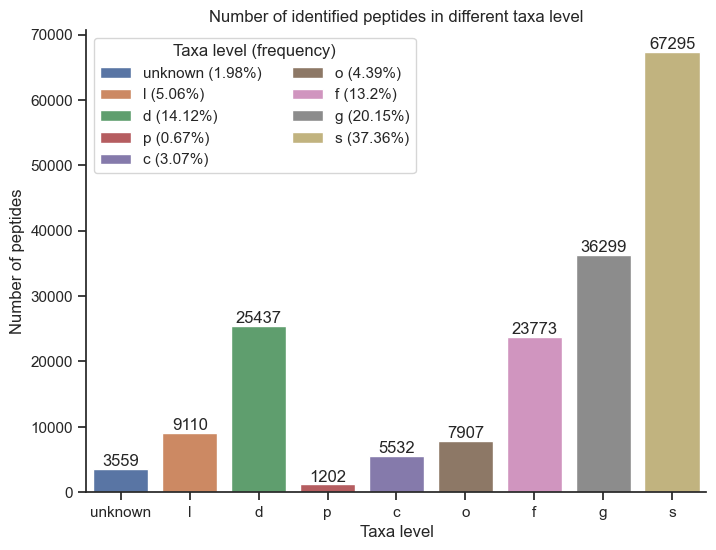

In [8]:
bp = BasicPlot(sw)
bp.plot_taxa_stats()

- Calculating the number of species classification

In [ ]:
sw.get_stats_taxa_level()

In [ ]:
bp.plot_taxa_number()

- Calculate the number and distribution of the selected functional proportion.

In [ ]:
sw.get_stats_func_prop()

In [ ]:
bp.plot_prop_stats()

- Plot PCA of a table (function, taxa or taxa-func)
- `show_label`: Whether to show text labels for each point

In [ ]:
bp.plot_pca_sns(sw.func_df, 'Description', show_label=False)

# 3. Difference Analysis

## 3.1 ANOVA TEST

- Calculate ANOVA for all groups

In [9]:
df_anova = sw.get_stats_anova()

ANOVA test for Taxon-Description in ['ACE005', 'ACE2', 'ADV', 'ASP', 'BAS', 'CYC', 'ERY', 'FOS', 'GLU', 'HSH', 'ISO', 'KES', 'LAC', 'MAL', 'MAN', 'MFE', 'NDC', 'NEO006', 'NEO2', 'PBS', 'REB', 'SAA', 'SAC05', 'SAC2', 'SOR', 'STE', 'SUC', 'THA03', 'THA2', 'XYL']


100%|██████████| 20739/20739 [05:11<00:00, 66.55it/s]


- Display the ANOVA result sorted by P-value

In [10]:
display(df_anova.sort_values(by='P-value'))

P-value  \
Taxon                                              Description                                                        
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cyclase                                    1.069379e-59   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Alpha amylase catalytic                             2.874864e-40   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... Synthesizes alpha-1,4-glucan chains using ADP-g...  7.839772e-40   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... Putative cyclase                                    7.169301e-36   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Alpha amylase catalytic                             1.162862e-35   
...                                                                                                             ...   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... Restriction endonuclease EcoRII, N-terminal         1.000000e+00   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... Forms part of the ribosomal stalk, playing a ce...  1.000000e+00   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... Dihydrolipoyl dehydrogenase                         1.000000e+00   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... TonB-linked outer membrane protein, SusC RagA f...  1.000000e+00   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... nuclear chromosome segregation                      1.000000e+00   

                                                                                                       f-statistic  \
Taxon                                              Description                                                       
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cyclase                                      41.000241   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Alpha amylase catalytic                               20.587759   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... Synthesizes alpha-1,4-glucan chains using ADP-g...    20.247267   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... Putative cyclase                                      17.336740   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Alpha amylase catalytic                               17.191300   
...                                                                                                            ...   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... Restriction endonuclease EcoRII, N-terminal            0.055804   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... Forms part of the ribosomal stalk, playing a ce...     0.052012   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... Dihydrolipoyl dehydrogenase                            0.048783   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... TonB-linked outer membrane protein, SusC RagA f...     0.045900   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... nuclear chromosome segregation                         0.021218   

                                                                                                         V1_14  \
Taxon                                              Description                                                   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cyclase                                          0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Alpha amylase catalytic                             2261304   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... Synthesizes alpha-1,4-glucan chains using ADP-g...  2161583   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__Os... Putative cyclase                                          0   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Alpha amylase catalytic                              752058   
...                                                                                                        ...   
d__Bacteria|p__Bacteroidota|c__Bacteroidia|o__B... Restriction endonuclease EcoRII, N-terminal         9622497   

- plot taxa-function across heatmap

Top 200, f-statistical, fig size: 30*30

Table size: 20739 x 192
Recommended figure size: width: 40, length: 40, front_title: 20, font_size: 10


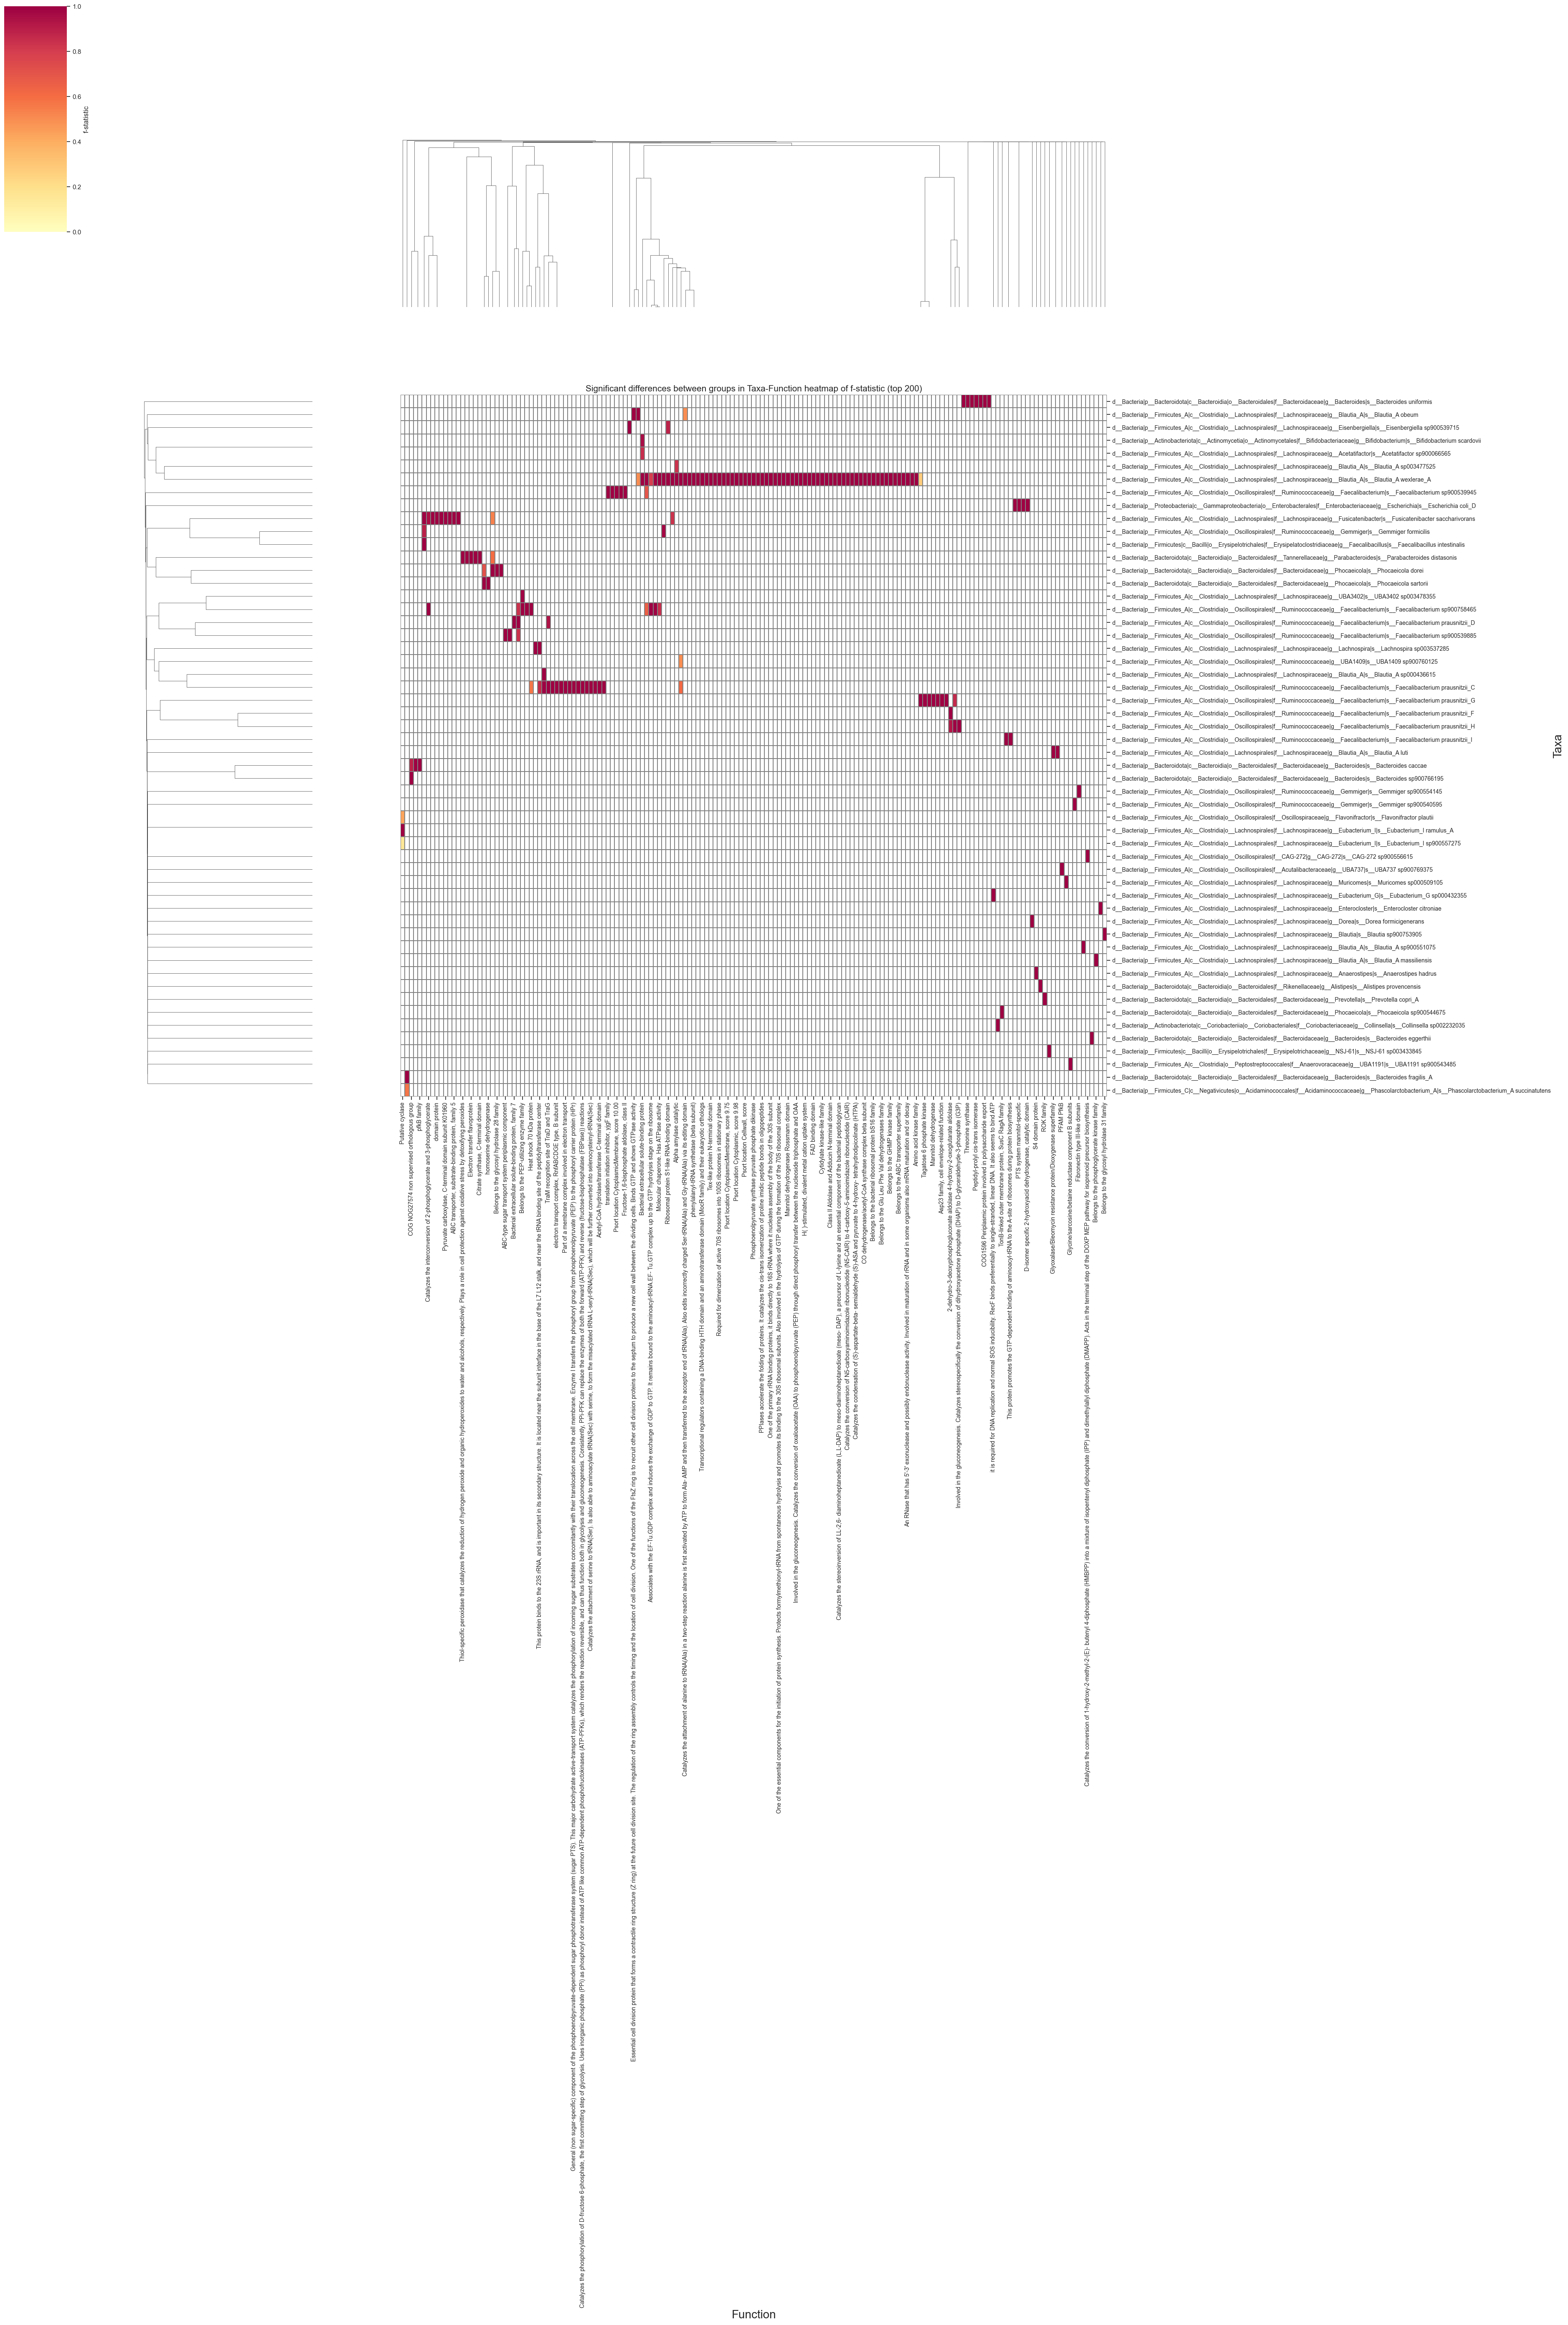

In [11]:
hp = HeatmapPlot(sw)
hp.plot_top_taxa_func_heatmap_of_test_res(df_anova, sw.func, 200, 'f', (30,30))

Top 100, p-value, auto figsize

Table size: 20739 x 192
Recommended figure size: width: 40, length: 40, front_title: 20, font_size: 10


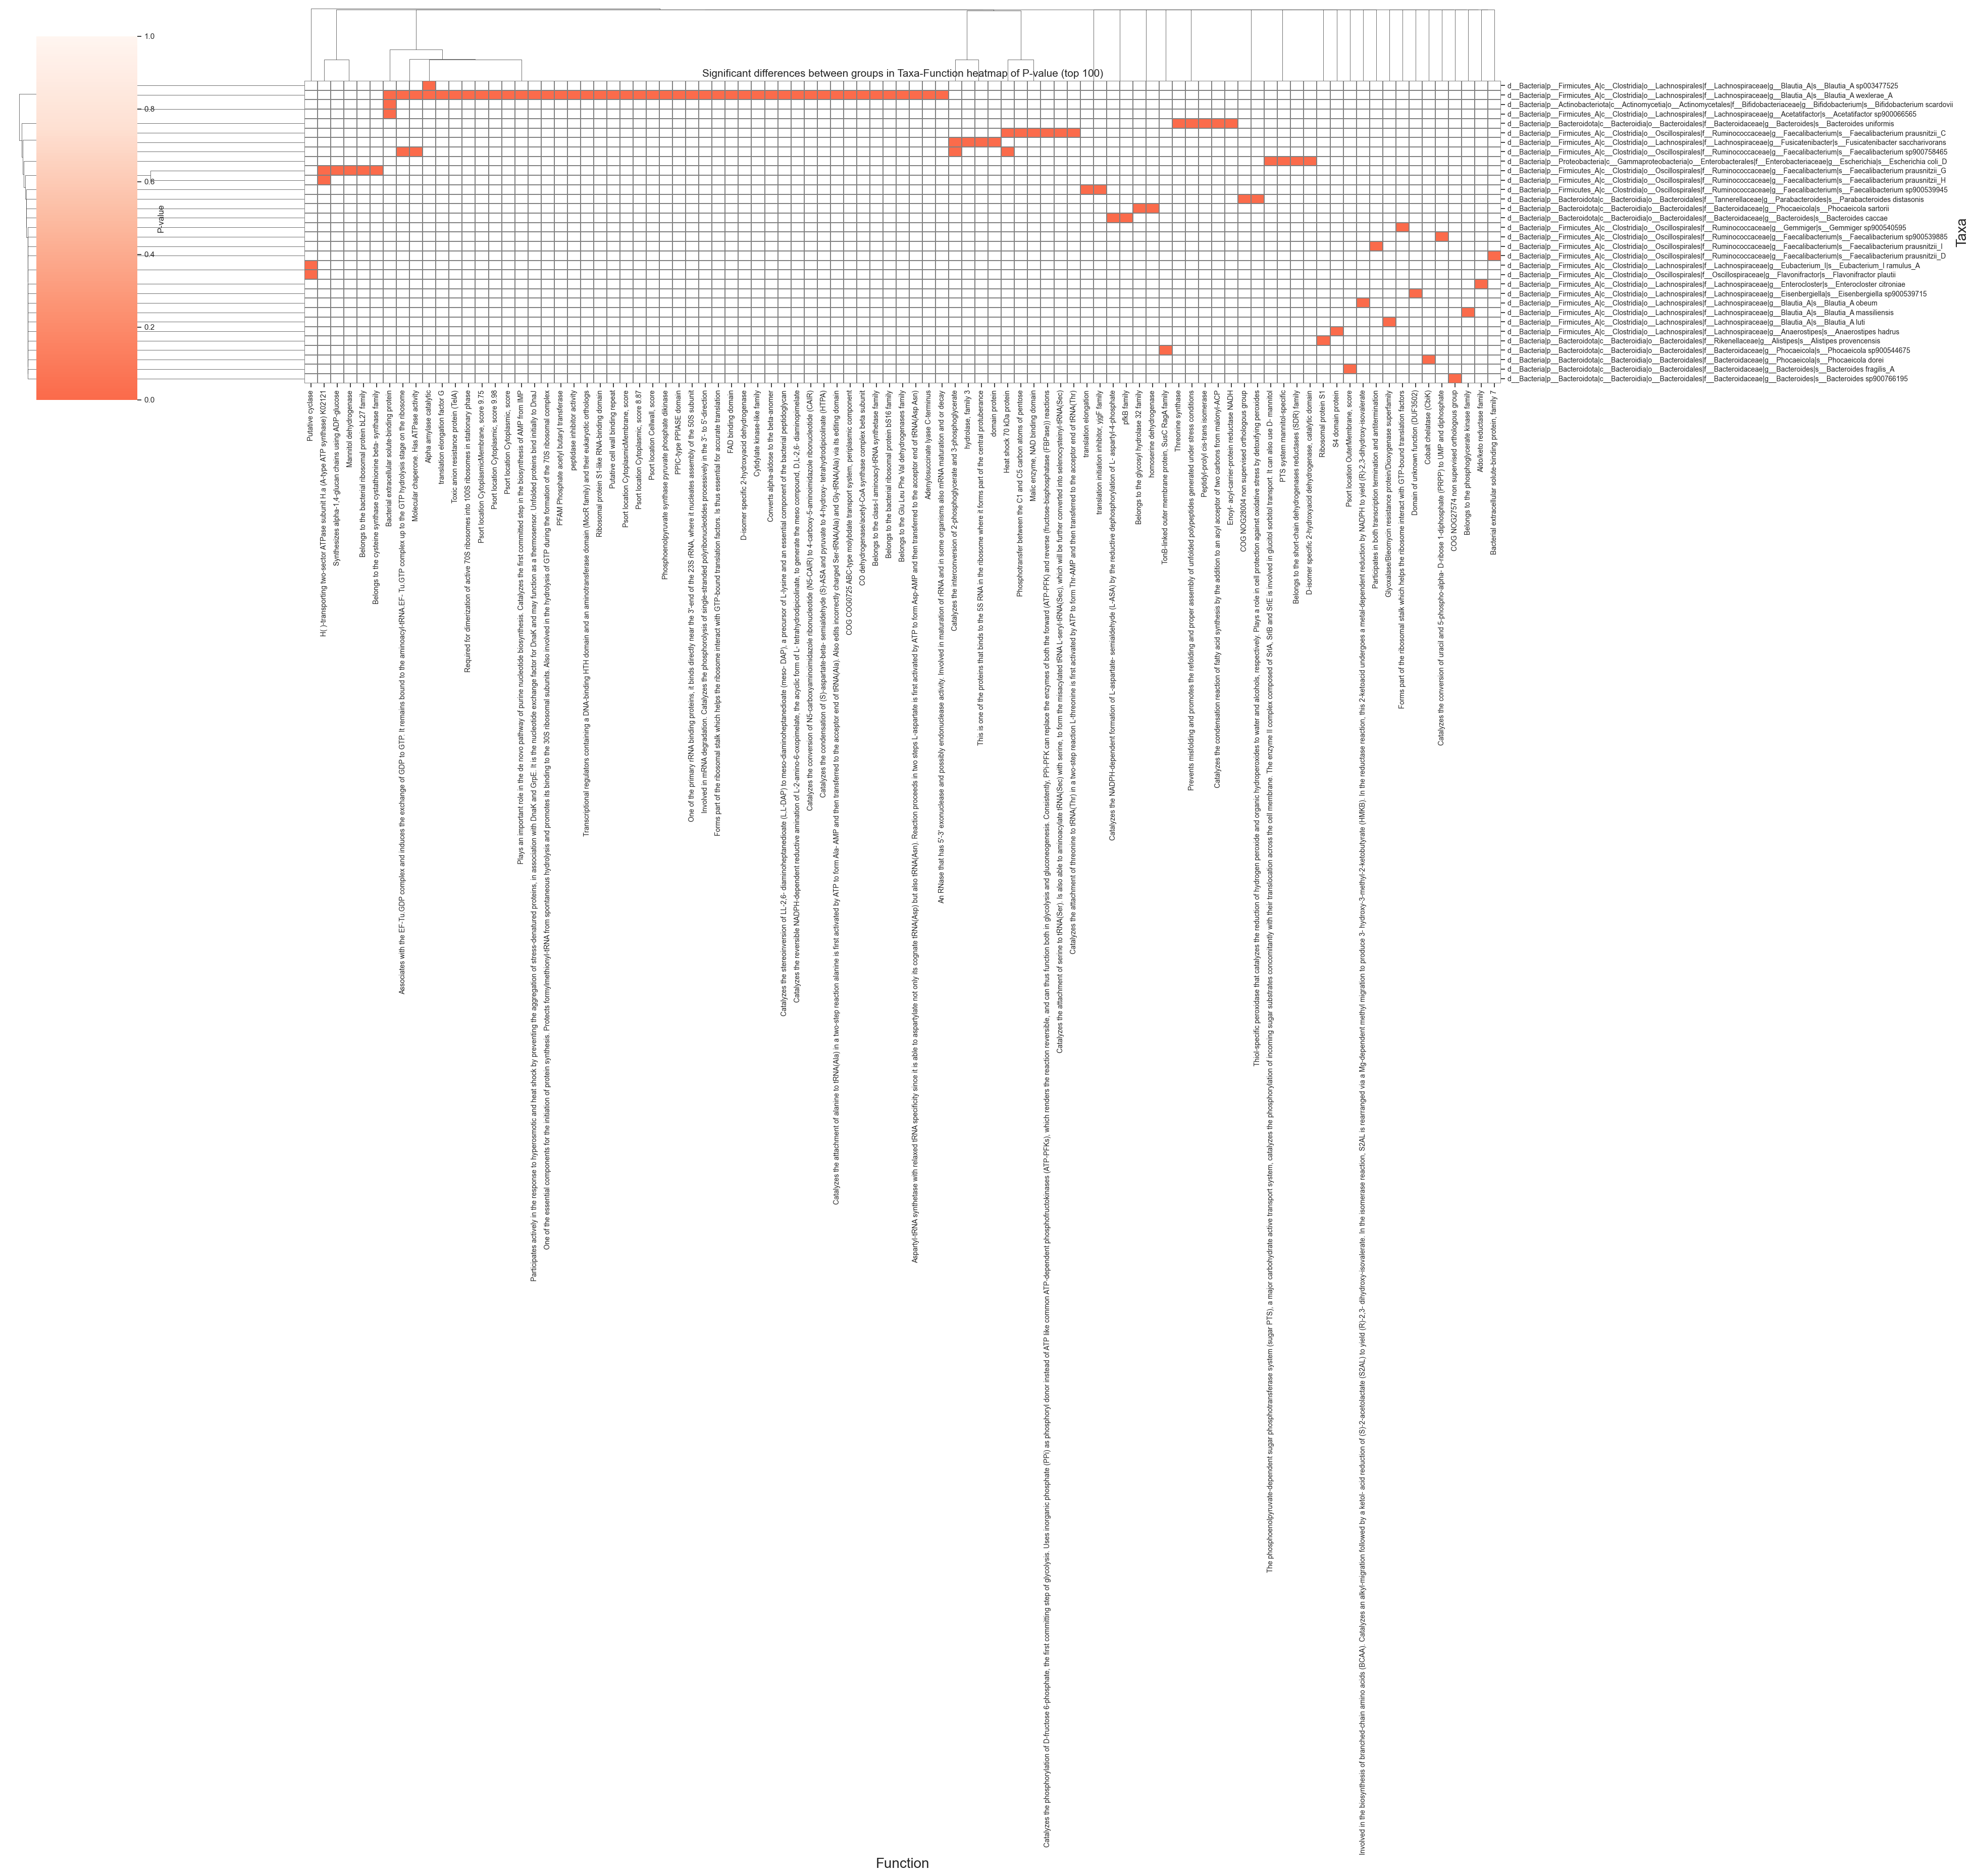

In [12]:
hp.plot_top_taxa_func_heatmap_of_test_res(df_anova, sw.func, 100, 'p')

## 3.2 TUKEY TEST

- Select species and functions of interest for TUKEY testing

In [13]:
taxon = 'd__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A|s__Blautia_A wexlerae_A'
function = 'Alpha amylase catalytic'
df_tukey = sw.get_stats_tukey_test(taxon_name=taxon, func_name=function)

          Multiple Comparison of Means - Tukey HSD, FWER=0.05           
group1 group2    meandiff    p-adj      lower          upper      reject
------------------------------------------------------------------------
ACE005   ACE2       102736.2    1.0  -9580060.2742   9785532.6742  False
ACE005    ADV       497062.0    1.0  -9185734.4742  10179858.4742  False
ACE005    ASP      1149026.0    1.0  -8533770.4742  10831822.4742  False
ACE005    BAS   -292064.5333    1.0  -8198034.7483   7613905.6816  False
ACE005    CYC       601164.2    1.0  -9081632.2742  10283960.6742  False
ACE005    ERY      1392532.2    1.0  -8290264.2742  11075328.6742  False
ACE005    FOS      1317520.4    1.0  -8365276.0742  11000316.8742  False
ACE005    GLU      1976288.8    1.0  -7706507.6742  11659085.2742  False
ACE005    HSH     10672654.0 0.0134    989857.5258  20355450.4742   True
ACE005    ISO     28356890.8    0.0  18674094.3258  38039687.2742   True
ACE005    KES       934088.2    1.0  -8748708.2742 

- plot tukey result

In [ ]:
tp = TukeyPlot()
tp.plot_tukey(df_tukey)

## 3.3 T-Test

- Select the two groups of interest for the T-test

In [24]:
df_ttest = sw.get_stats_ttest(group_list=['MAL', 'PBS'])
display(df_ttest.sort_values(by='P-value'))

t-test for Taxon-Description in ['MAL', 'PBS']


100%|██████████| 20739/20739 [00:25<00:00, 811.32it/s]


P-value  \
Taxon                                              Description                                                        
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the bacterial ribosomal protein bS16...  6.530428e-11   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the phosphoglycerate kinase family       1.422027e-10   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cell wall binding repeat                   5.536336e-10   
                                                   Bacterial extracellular solute-binding protein      6.026885e-10   
                                                   Psort location Cytoplasmic, score 9.98              8.880045e-09   
...                                                                                                             ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Oxidoreductase required for the transfer of ele...           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Glycoside hydrolase, family 20, catalytic core               NaN   
                                                   May play a key role in the regulation of the in...           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Binds to 23S rRNA. Forms part of two intersubun...           NaN   
                                                   Pyruvate phosphate dikinase, PEP/pyruvate bindi...           NaN   

                                                                                                       t-statistic  \
Taxon                                              Description                                                       
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the bacterial ribosomal protein bS16...    13.604118   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the phosphoglycerate kinase family         12.974279   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cell wall binding repeat                     11.931107   
                                                   Bacterial extracellular solute-binding protein        11.868243   
                                                   Psort location Cytoplasmic, score 9.98                10.003715   
...                                                                                                            ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Oxidoreductase required for the transfer of ele...          NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Glycoside hydrolase, family 20, catalytic core              NaN   
                                                   May play a key role in the regulation of the in...          NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Binds to 23S rRNA. Forms part of two intersubun...          NaN   
                                                   Pyruvate phosphate dikinase, PEP/pyruvate bindi...          NaN   

                                                                                                          V1_32  \
Taxon                                              Description                                                    
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the bacterial ribosomal protein bS16...   3405147   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Belongs to the phosphoglycerate kinase family       10544927   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... Putative cell wall binding repeat                    4024996   
                                                   Bacterial extracellular solute-binding protein      55357633   
                                                   Psort location Cytoplasmic, score 9.98              33008066   
...                                                                                                         ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... Oxidoreductase required for the transfer of ele...    

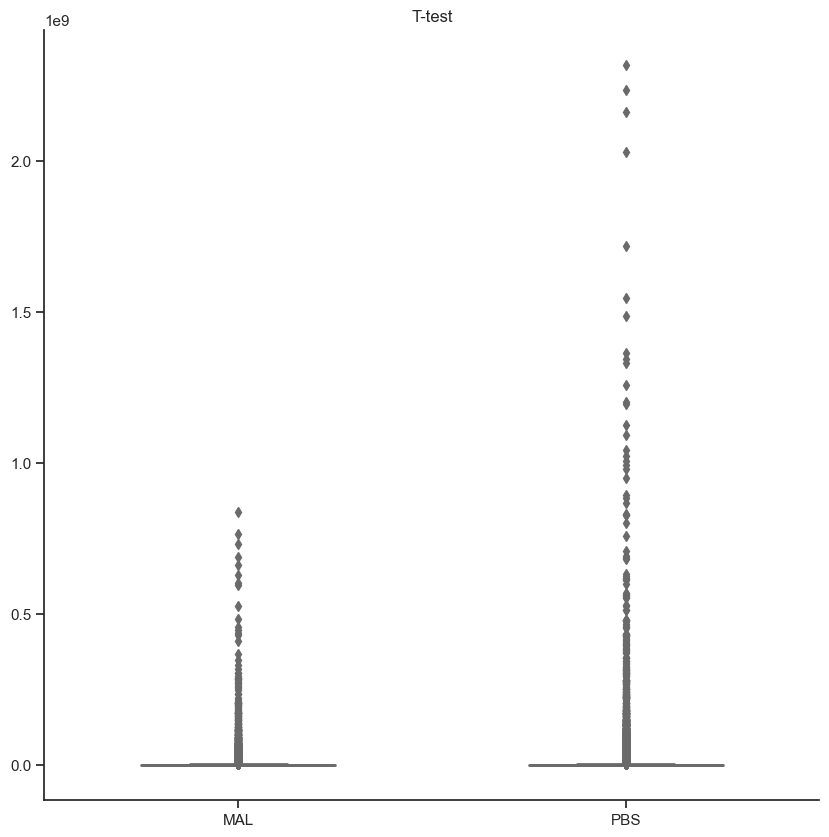

In [35]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
group_list = ['MAL', 'PBS']
group1 = df_ttest[sw.get_sample_list_in_a_group(group_list[0])].values
group2 = df_ttest[sw.get_sample_list_in_a_group(group_list[1])].values


plt.figure(figsize=(10,10))
fig = sns.boxplot(data=[group1, group2], palette="Set3", color='white', width=0.5, linewidth=2)

fig.set_xticklabels(group_list)
fig.set_title('T-test')


plt.show()

- Plot top 100 taxa-function across heatmap (p-value)

Table size: 20739 x 22
Recommended figure size: width: 27, length: 40, front_title: 20, font_size: 10


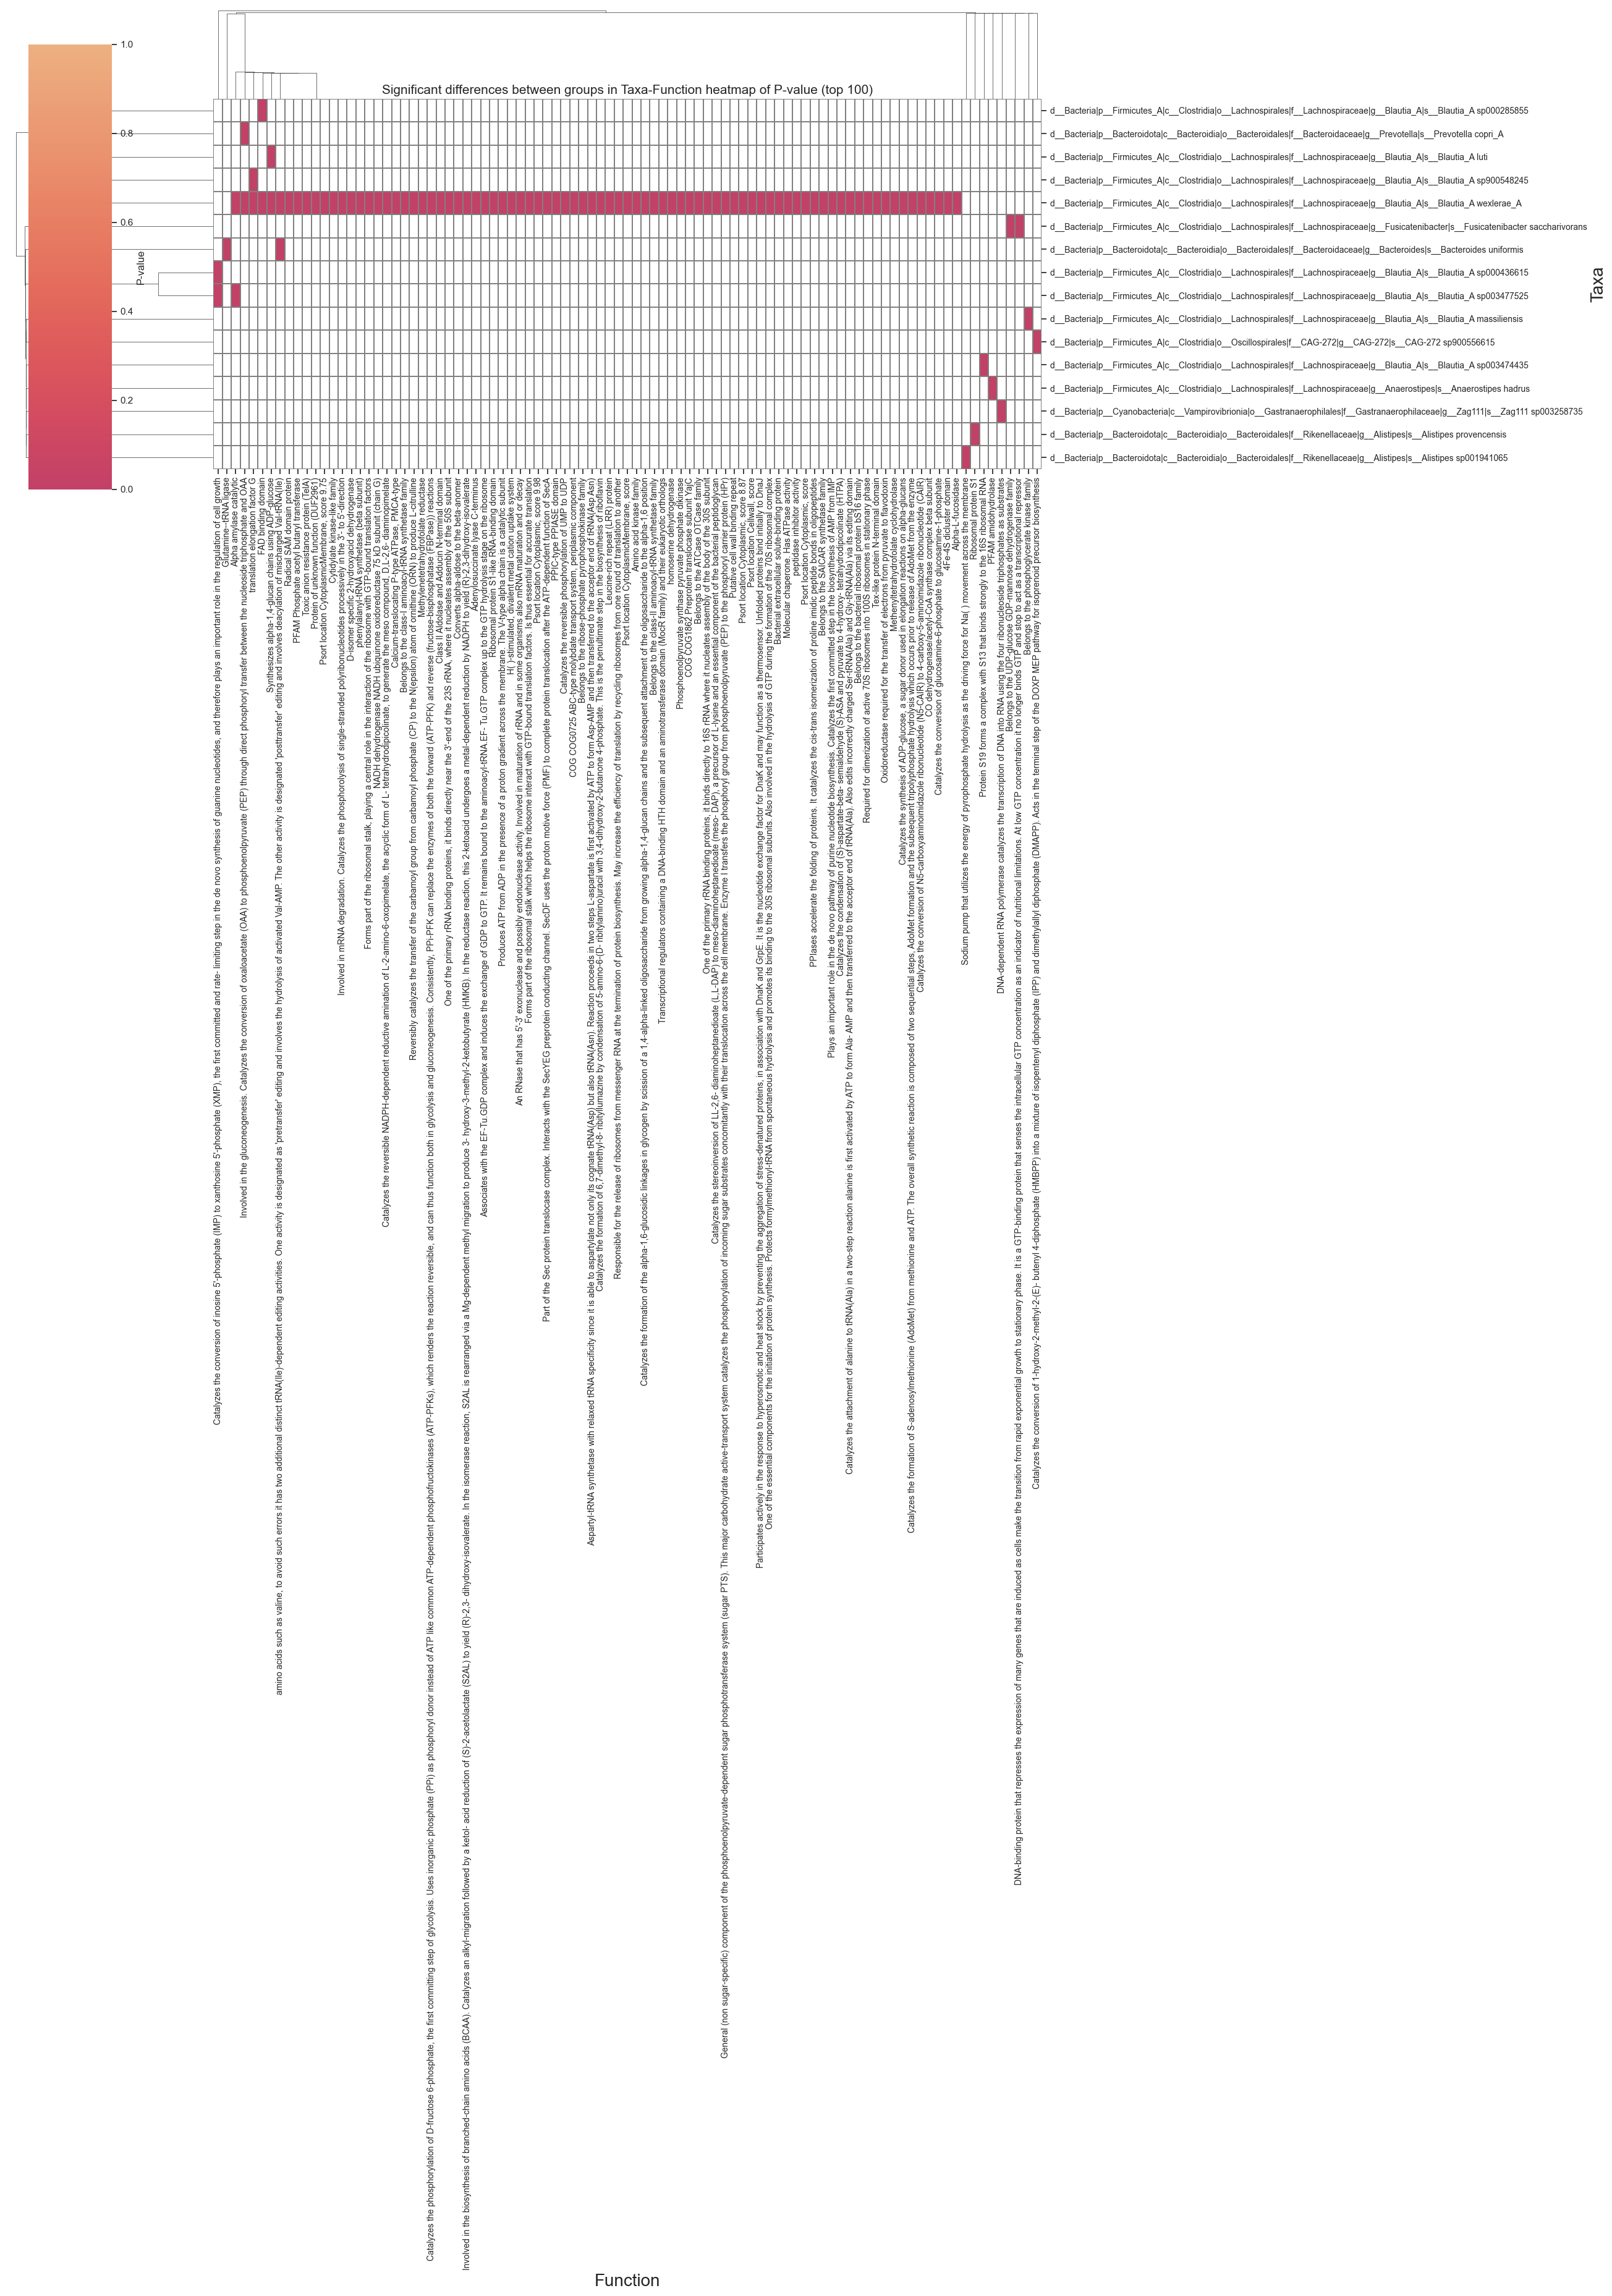

In [45]:
from distinctipy import distinctipy
import seaborn as sns
import matplotlib.pyplot as plt

class HeatmapPlot2:
    def __init__(self, tfobj):
        self.tfobj =  tfobj
    # input: df, func_name, top_number, value_type, fig_size
    # EXAMPLE: plot_top_taxa_func_heatmap_of_test_res(df_anova, sw.func, 200, 'f', (30,30))
    def plot_top_taxa_func_heatmap_of_test_res(self, df, func_name:str, top_number:str = 100, 
                                        value_type:str = 'p', fig_size:tuple = None):

        
        if fig_size is None:
            width, length, front_title, font_size = self.__fit_size(df)
            fig_size = (width, length)
        else:
            width, length, front_title, font_size = self.__fit_size(df)
        
        dft = df.copy()
        dft.reset_index(inplace=True)
        dft = dft.iloc[:, :4]
        if value_type == 'f':
            plot_type = 'f-statistic'
            color = 'Spectral_r'
            scale = 1
        elif value_type == 'p':
            plot_type = 'P-value'
            color = 'flare_r'
            scale = None
        elif value_type == 't':
            plot_type = 't-statistic'
            color = 'hot_r'
            scale = 1
        else:
            raise ValueError("type must be 'p' or 'f' or 't'")
        if plot_type not in df.columns:
            plot_type = 'P-value'


        
        dft = dft[dft['P-value'] < 0.05]
        if 'f-statistic' in dft.columns.tolist():
            dft = dft.sort_values(by=['P-value', 'f-statistic'], ascending=[True, False], ignore_index=True)
        elif 't-statistic' in dft.columns.tolist():
            dft = dft.sort_values(by=['P-value', 't-statistic'], ascending=[True, False], ignore_index=True)
        df_top = dft.head(top_number)
        #display(df_top)
        df_top = df_top.pivot(index='Taxon', columns=func_name, values=plot_type)
        df_plot = df_top.fillna(1) if plot_type == 'P-value' else df_top.fillna(0)


        fig = sns.clustermap(df_plot, center=0, linewidths=.3, linecolor="grey", 
                            figsize=fig_size, cmap = color, 
                        method='average',  metric='correlation',cbar_kws={'label': plot_type}, 
                        standard_scale=scale, mask=df_top.isnull(), vmin=0, vmax=1)

        fig.ax_heatmap.set_xticklabels(fig.ax_heatmap.get_xmajorticklabels(), fontsize = font_size)
        fig.ax_heatmap.set_yticklabels(fig.ax_heatmap.get_ymajorticklabels(), fontsize = font_size)
        fig.ax_heatmap.set_xlabel('Function', fontsize = front_title)
        fig.ax_heatmap.set_ylabel('Taxa', fontsize = front_title)

        fig.ax_heatmap.set_title(f"Significant differences between groups in Taxa-Function heatmap of {plot_type} (top {top_number})", fontsize = 15)
        plt.show()
        return fig


    # Plot basic heatmap of matrix with color bar
    # EXAMPLE: plot_heatmap(sw, mat=get_top_intensity_matrix_of_test_res(df=df_anova, df_type='anova', top_num=100), 
                #  title = 'The heatmap of top 100 significant differences between groups in Taxa-Function', 
                #  fig_size=(30,30), scale=0)
    def plot_basic_heatmap(self,  mat, title = 'Heatmap',fig_size:tuple = None, 
                    scale:int = None, col_cluster:bool = True, row_cluster:bool = True):
        import seaborn as sns
        import matplotlib.pyplot as plt
        mat = mat.copy()
        meta_df = self.tfobj.meta_df
        meta_name = self.tfobj.meta_name

        if fig_size is None:
            width, length, front_title, font_size = self.__fit_size(mat)
            fig_size = (width, length)
        else:
            width, length, front_title, font_size = self.__fit_size(mat)


        def assign_colors(groups):
            colors = distinctipy.get_colors(len(set(groups)))
            result = []
            for group in groups:
                index = sorted(set(groups)).index(group)
                result.append(colors[index])
            return result



        # create color list for groups & rename columns
        col_names = mat.columns.tolist()
        groups_list = []
        new_col_names = []
        for i in col_names:
            group = meta_df[meta_df['Sample'] == i]
            group = group[meta_name].values[0]
            new_col_names.append(f'{i} ({group})')
            groups_list.append(group)
        color_list = assign_colors(groups_list)
        mat.columns = new_col_names

        plt.figure(figsize=fig_size)
        fig  = sns.clustermap(mat, center=0, linewidths=.3, linecolor="grey",  cmap = 'Spectral_r',figsize=fig_size,
                        cbar_kws={'label': 'Intensity'}, col_cluster=col_cluster, row_cluster=row_cluster,
                            standard_scale=scale, col_colors=color_list)
        fig.ax_heatmap.set_xticklabels(fig.ax_heatmap.get_xmajorticklabels(), fontsize = font_size)
        fig.ax_heatmap.set_yticklabels(fig.ax_heatmap.get_ymajorticklabels(), fontsize = font_size)
        fig.ax_col_dendrogram.set_title(title, fontsize = front_title)
        
        return fig
        
        
    def __fit_size(self, df):
        col_num = len(df.columns)
        row_num = len(df.index)

        # 计算宽度和长度
        width = max(12, min(40, 5 + col_num * 1))
        length = max(12, min(40, 5 + row_num * 0.5))

        # 根据行数和列数调整标题和字体大小
        if row_num > 100 or col_num > 20:
            front_title = 20
            font_size = 10
        else:
            front_title = 15
            font_size = 10
        print(f'Table size: {row_num} x {col_num}')
        print(f'Recommended figure size: width: {width}, length: {length}, front_title: {front_title}, font_size: {font_size}')
        return width, length, front_title, font_size
    
hp2  = HeatmapPlot2(sw)
hp2.plot_top_taxa_func_heatmap_of_test_res(df_ttest, sw.func, 100, 'p')

Table size: 20739 x 22
Recommended figure size: width: 27, length: 40, front_title: 20, font_size: 10


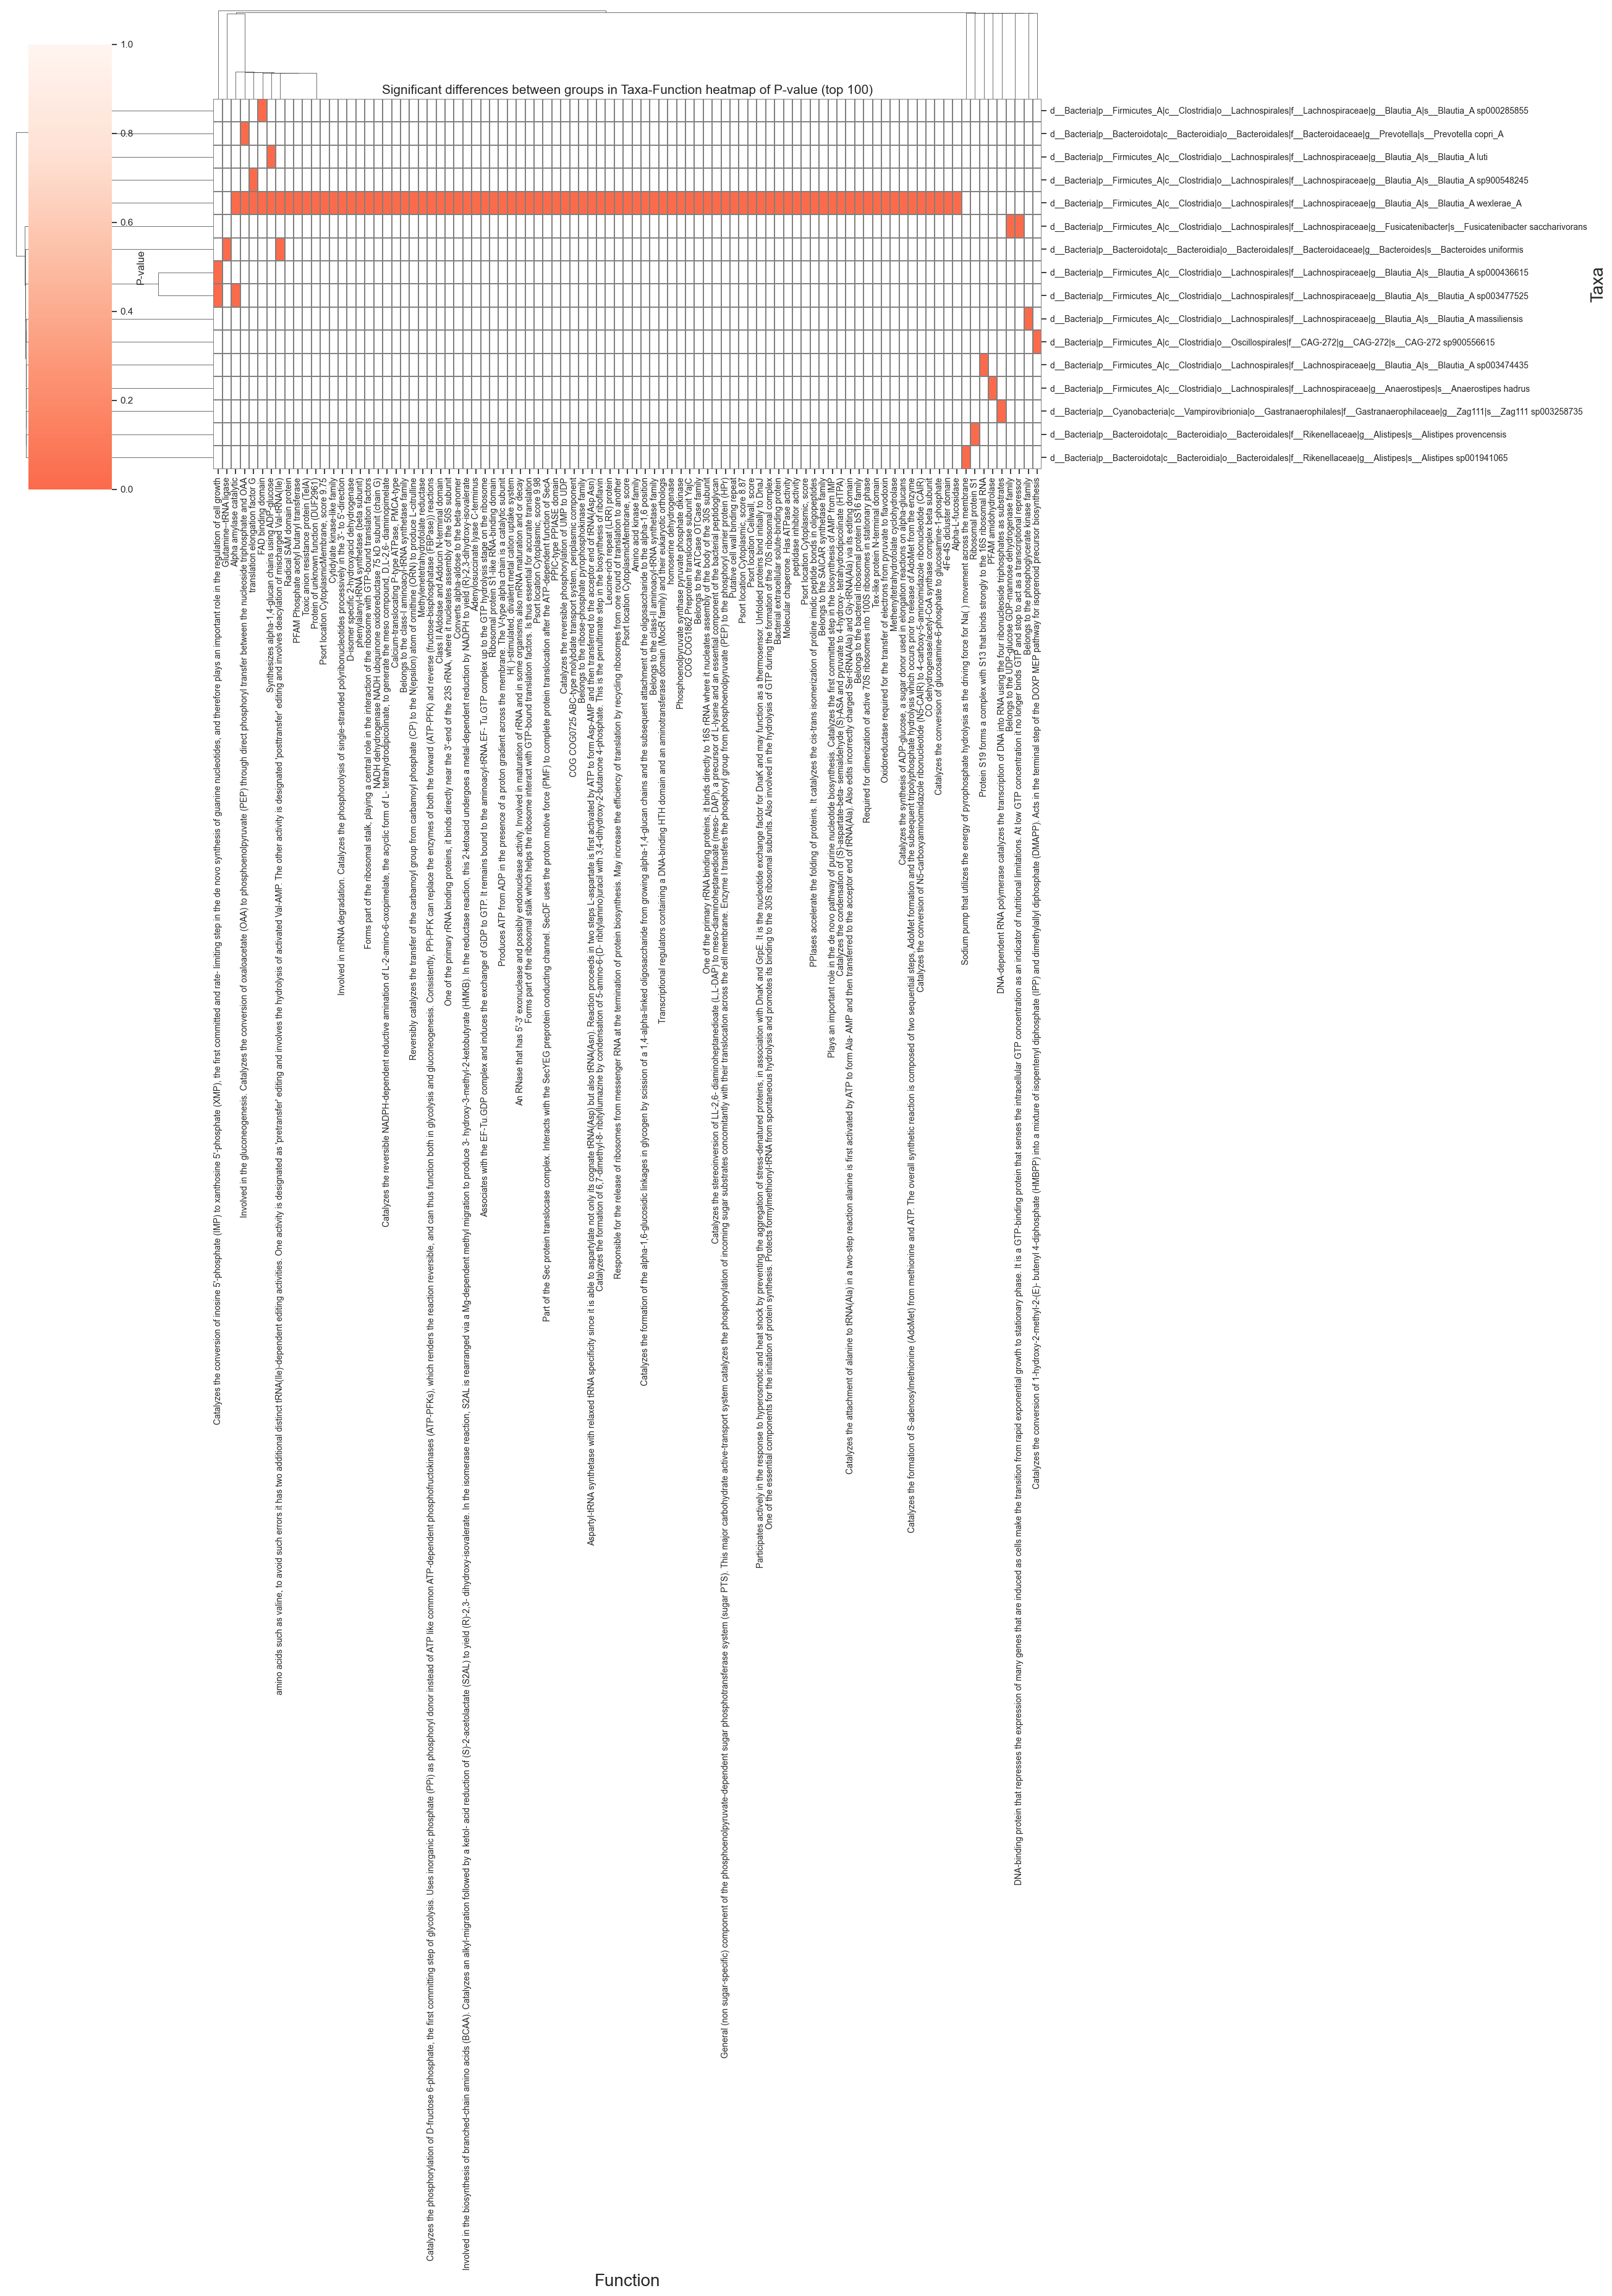

In [36]:
hp.plot_top_taxa_func_heatmap_of_test_res(df_ttest, sw.func, 100, 'p')

## 3.4 DESeq2 for Log2FC

- Select the two groups of interest for calculating log2FC

In [14]:
df_fc = sw.get_stats_deseq2(sw.taxa_func_df , group_list=['MAL', 'PBS'])

Fitting size factors...
... done in 0.01 seconds.

Fitting dispersions...
... done in 2.88 seconds.

Fitting dispersion trend curve...
... done in 4.72 seconds.

Fitting MAP dispersions...
... done in 2.33 seconds.

Fitting LFCs...
... done in 6.19 seconds.

Refitting 5499 outliers.

Fitting dispersions...
... done in 0.40 seconds.

Fitting MAP dispersions...
... done in 0.40 seconds.

Fitting LFCs...
... done in 3.13 seconds.

Running Wald tests...
... done in 1.08 seconds.

Log2 fold change & Wald test p-value: Sweetener PBS vs MAL


baseMean  \
Taxa-Func                                                         
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...     0.000000   
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...  7328.721114   
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...     0.000000   
d__Archaea|p__Methanobacteriota|c__Methanobacte...  4244.426286   
d__Archaea|p__Methanobacteriota|c__Methanobacte...     0.000000   
...                                                         ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  6156.085578   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  2124.127616   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...   162.398547   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...     0.000000   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...     0.000000   

                                                    log2FoldChange     lfcSE  \
Taxa-Func                                                                      
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...             NaN       NaN   
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...       -0.337907  2.304200   
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...             NaN       NaN   
d__Archaea|p__Methanobacteriota|c__Methanobacte...       -4.409273  3.331767   
d__Archaea|p__Methanobacteriota|c__Methanobacte...             NaN       NaN   
...                                                            ...       ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...        0.017438  0.963073   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       -0.167809  2.660427   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...        8.914786  0.000000   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...             NaN       NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...             NaN       NaN   

                                                        stat    pvalue  \
Taxa-Func                                                                
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...       NaN       NaN   
d__Archaea|p__Halobacteriota|c__Halobacteria|o_... -0.146648  0.883410   
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...       NaN       NaN   
d__Archaea|p__Methanobacteriota|c__Methanobacte... -1.323403       NaN   
d__Archaea|p__Methanobacteriota|c__Methanobacte...       NaN       NaN   
...                                                      ...       ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  0.018107  0.985554   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr... -0.063076  0.949706   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  0.000000       NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN       NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN       NaN   

                                                        padj  
Taxa-Func                                                     
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...       NaN  
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...  0.999902  
d__Archaea|p__Halobacteriota|c__Halobacteria|o_...       NaN  
d__Archaea|p__Methanobacteriota|c__Methanobacte...       NaN  
d__Archaea|p__Methanobacteriota|c__Methanobacte...       NaN  
...                                                      ...  
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  0.999902  
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...  0.999902  
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN  
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN  
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN  

[20739 rows x 6 columns]

- Show the DESeq2 result table sorted by `padj` and `log2FoldChange`

In [15]:
display(df_fc.sort_values(by=['padj', 'log2FoldChange']))

baseMean  \
Taxa-Func                                                           
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  125962.524088   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  233511.214560   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...    1918.011025   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  194107.642804   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...   38199.451975   
...                                                           ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       0.000000   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       0.000000   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       0.000000   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       0.000000   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       0.000000   

                                                    log2FoldChange     lfcSE  \
Taxa-Func                                                                      
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...       -3.348493  0.379603   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...       -1.973048  0.257091   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...      -15.361539  2.024428   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...       -2.768583  0.369716   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...       -2.881334  0.401324   
...                                                            ...       ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...             NaN       NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...             NaN       NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...             NaN       NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...             NaN       NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...             NaN       NaN   

                                                        stat        pvalue  \
Taxa-Func                                                                    
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... -8.821032  1.134092e-18   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... -7.674504  1.660605e-14   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... -7.588090  3.246559e-14   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... -7.488398  6.971951e-14   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La... -7.179569  6.993161e-13   
...                                                      ...           ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN           NaN   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...       NaN           NaN   

                                                            padj     V1_32  \
Taxa-Func                                                                    
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1.579336e-14  20316636   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1.156279e-10  33008066   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1.507052e-10   1264470   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  2.427285e-10  55357633   
d__Bacteria|p__Firmicutes_A|c__Clostridia|o__La...  1.725112e-09   7711614   
...                                                          ...       ...   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...           NaN         0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...           NaN         0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...           NaN         0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...           NaN         0   
d__Bacteria|p__Verrucomicrobiota|c__Verrucomicr...           NaN         0   

                                                       V2_32     V3_32  \
Taxa-Func     

-  Volcano plot with `padj=0.05`, `log2fc=1`

<Axes: title={'center': 'Volcano plot of MAL vs PBS (padj < 0.05, log2FoldChange > 1)'}, xlabel='log2FoldChange', ylabel='-log10(padj)'>

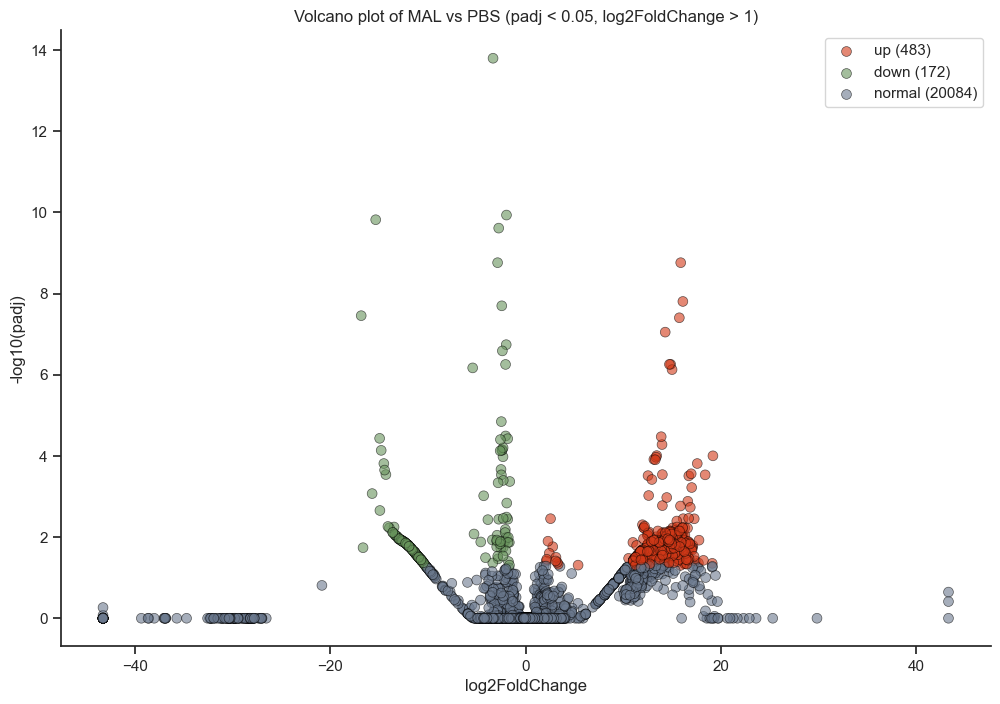

In [46]:
vp = VolcanoPlot()
vp.plot_volcano(df = df_fc, padj=0.05, log2fc=1, title_name='MAL vs PBS', figsize=(12, 8))

- Sankey plot with` width=1200`, `height=800`, `p_value=0.005`, `log2fc=1`

In [23]:
sp = SankeyPlot()
pic = sp.plot_fc_sankey(df_fc, width=1800, height=850, p_value=0.005, log2fc=1)
pic.render_notebook()
pic.render('MAL_vs_PBS.html')


Creating nodes and links for upregulated...
Number of nodes: 105
Number of links: 105
Creating nodes and links for downregulated...
Number of nodes: 71
Number of links: 70


'd:\\OneDrive - University of Ottawa\\code\\TaxaFunc\\TaxaFuncExplore\\MAL_vs_PBS.svg'

# 4. Other functions

## 4.1 Get some basic info

- `Input`: a group name 
- `output`: a list containing all samples of the group

In [ ]:
sw.get_sample_list_in_a_group('NDC')

- `Input`: a meat name 
- `output`: a list containing all groups of the meta

In [ ]:
print(sw.get_meta_list('Person'))

## 4.2 Get intensity matrix

In [ ]:
taxon = 'd__Bacteria|p__Firmicutes_A|c__Clostridia|o__Lachnospirales|f__Lachnospiraceae|g__Blautia_A|s__Blautia_A wexlerae_A'
function = 'Alpha amylase catalytic'

- `Input`: a taxon name 
- `output`: A matrix of all functional intensity under the taxon

In [ ]:
sw.get_intensity_matrix(taxon_name=taxon)

- `Input`: a function name 
- `output`: A matrix of all species intensity under the function

In [ ]:
sw.get_intensity_matrix(func_name=function)

- `Input`: a taxon name and function name 
- `output`: A matrix of all peptides intensity under the taxa-func

In [ ]:
sw.get_intensity_matrix(taxon_name=taxon, func_name=function)

- Output only the groups we care about

In [ ]:
sw.get_intensity_matrix(taxon_name=taxon, func_name=function, groups=['MAL', 'PBS'])

## 4.3 Get top intensity matrix of test results ('anova', 'ttest' or 'log2fc')

-  Top 10 intensity matrix of T-test results

In [ ]:
sw.get_top_intensity_matrix_of_test_res(df_ttest, df_type='ttest', top_num=10)

## 4.4 Plot intensity heatmap

- Plot a intensity heatmap of a function
- All sample names are automatically added to the grouping information in parentheses
- Different colors represent different groups

In [ ]:
hp.plot_basic_heatmap(mat=sw.get_intensity_matrix(func_name=function), title='Alpha amylase catalytic')

- Plot a intensity heatmap of a taxa-func


In [ ]:
hp.plot_basic_heatmap(mat=sw.get_intensity_matrix(taxon_name=taxon,func_name=function ), title='Intensity of Blautia_A wexlerae_A - Alpha amylase catalytic')

- Plot a intensity heatmap of a function of `some groups` we care


In [ ]:
hp.plot_basic_heatmap(mat=sw.get_intensity_matrix(func_name=function, groups=['MAL', 'PBS'] ), title='Alpha amylase catalytic')

- Plot a intensity heatmap of a taxa-func of `some groups`

In [ ]:
hp.plot_basic_heatmap(mat=sw.get_intensity_matrix(taxon_name=taxon,func_name=function, groups=['MAL', 'PBS'] ), title='Intensity of Blautia_A wexlerae_A - Alpha amylase catalytic')


## 4.5 Line plot of intensity

- plot line of intensity of different samples

In [ ]:
lp = LinePlot(sw)
lp.plot_intensity_line(func_name=function, fig_size=(25, 10))

In [ ]:
lp.plot_intensity_line(taxon_name=taxon,func_name=function, fig_size=(25,10))